# <span style="color:green"> Laboratorio di Simulazione Numerica (NSL) </span>
## <span style="color:blue">  Esercitazione 4</span>

## Simulazione di Dinamica Molecolare(MD) di un fluido con potenziale di interazione Lennard-Jones(LJ) nell'Ensemble MicroCanonico 

### Obiettivo

In questa esercitazione l'obiettivo consiste nel migliorare ed arricchire il codice di **dinamica molecolare**, inizialmente fornito,  al fine di simulare il comportamento di un sistema di particelle, un fluido con $N$ gradi di libertà, con un potenziale di interazione tipo Lennard Jones (potenziale a *corto raggio*) nell'ambito della meccanica statistica e nell'ensemble microcanonico, quindi, a fissato **numero di particelle** $N$, **volume** $V$, **energia** E, tre variabili di stato che caratterizzano la stato termodinamico del sistema all'equilibrio. Le nuove configurazioni, ossia l'evoluzione temporale dei gradi di libertà del sistema nel corso della simulazione, sono ottenute risolvendo le equazioni del moto in modo approssimato con un algoritmo numerico, detto di **Verlet**, che prima di tutto lascia invariata l'energia del sistema, un "must" nell'ensemble microcanonico.

### Richiami teorici

Lo scopo principale della **meccanica statistica** è quello di saper predire le proprietà macroscopiche di un sistema termodinamico, di solito all'equilibrio, a partire dalla conoscenza delle leggi microscopiche che governano le interazioni tra i gradi di libertà costituenti il sistema.

La conoscenza dello stato microscopico in cui si trova il sistema è spesso ignota. Gli unici vincoli a disposizione sono forniti dalla conoscenza di alcune, poche, quantità macroscopiche (energia, temperatura, volume, ecc..) che limitano il volume di esplorazione dello spazio delle fasi (spazio 6N-dimensionale) $\Gamma$, i cui elementi, detti punti rappresentativi $(\vec{q},\vec{p})$, raccolgono tutte le coordinate spaziali e dei momenti delle $N$ particelle costituenti il sistema specificandone lo stato microscopico.

Il formalismo della meccanica statistica sviluppato a partire dalla teoria degli Ensemble statistici e, spesso, accompagnato dall'ipotesi di ergodicità, permette di calcolare medie di insieme di opportune osservabili che caratterizzano le proprietà macroscopiche del sistema una volta nota la cosiddetta funzione densità o funzione di distribuzione dello spazio delle fasi $\rho(\vec{q},\vec{p},t)$. Quest'ultima rappresenta il modo in cui i membri di un ensemble, una collezione di sistemi statisitici caratterizzati dallo stesso macrostato ma da microstati differenti, sono distribuiti su tutti i possibili microstati, permessi dai vincoli, a diversi istanti temporali (infatti i punti rappresentativi di $\Gamma$ evolvono con lo scorrere del tempo disegnando traiettorie nello spazio delle fasi).

L'espressione generale per le medie di ensemble, opportunamente normalizzata, è qui di seguito riportata per una generica osservabile $f = f(\vec{q},\vec{p})$ funzione delle coordinate configurazionali e del momento:
$$
\langle f(\vec{q},\vec{p})\rangle = \frac{\int f(\vec{q},\vec{p}) \rho(\vec{q},\vec{p},t) d^{3N}q d^{3N}p}{\int \rho(\vec{q},\vec{p},t) d^{3N}q d^{3N}p} 
$$

In particolare un sistema all'equilibrio è rappresentato da una funzione densità invariante rispetto al tempo che qualifica un Ensemble come stazionario. Se si considera una $\rho(\vec{q},\vec{p},t) = cost$ indipendente da tutte le variabili da una parte si realizza la precedente condizione ed inoltre , dall'altra, tale scelta corrisponde a quella di un ensemble dove i suoi membri sono uniformmente distribuiti su tutti i possibili microstati permessi. Tale ensemble è detto, appunto, microcanonico.

Esso è caratterizzato dal possedere un valore dell'energia $E$ fissato e da una funzione densità:
$$
\rho(\vec{q},\vec{p}) = \begin{cases} k & \mbox{se } E < H(\vec{q},\vec{p}) < E + \Delta \\ 0 & \mbox{altrimenti}
\end{cases}
$$
con $k$ un valore costante, $\Delta$ l'incertezza sulla conoscenza del valore dell'energia e $H(\vec{q},\vec{p})$ il modello hamiltoniano adottato.

Nell'ensemble microcanonico(**NVE**) le medie di insieme sono ottenute con la seguente formula semplificando la funzione densità:
$$
\langle f(\vec{q},\vec{p})\rangle = \frac{\int f(\vec{q},\vec{p}) k d^{3N}q d^{3N}p}{\int k d^{3N}q d^{3N}p} = \frac{\int f(\vec{q},\vec{p}) d^{3N}q d^{3N}p}{\int d^{3N}q d^{3N}p}
$$
con la normalizzazione (il denominatore) che altro non rappresenta che la regione **rilevante** dello spazio delle fasi.


Solo pochi e semplici problemi di meccanica statistica possono essere risolti esattamente in maniera analitica, quando i sistemi diventano complessi (le funzioni che descrivono il potenziale di interazione diventano troppo complicate) bisogna affidarsi o a delle approsimazioni teoriche o, nella maggior parte dei casi, a tecniche di simulazione numerica.

La **Dinamica Molecolare** è la tecnica di simulazione introdotta e usata in questa esercitazione per risolvere uno specifico problema di meccanica statistica. Come anticipato in precedenza essa, noto il potenziale di interazione tra i gradi di libertà costituenti un sistema, simulando numericamente la risoluzione dell'equazioni del moto di Hamilton con opportune condizioni al contorno date dalla geometria e simmetria del sistema, genera informazioni sulle grandezze microscopiche che possono essere convertite in informazioni per le osservabili macroscopiche servendosi degli strumenti dati dalla meccanica statistica (medie di Ensemble). Gli integrali multidimensionali delle medie di ensemble in NVE sono risolti campionando le configurazioni (*Verlet*), permesse dai vincoli, dello spazio delle fasi e procedendo con tecniche Monte Carlo (vedi *Esercitazione 2*)

Nella seguente esercitazione il potenziale che descrive le interazioni tra le $N=108$ particelle costituenti che la tecnica riceve in input è modellizzato come un potenziale di interazione a coppie additivo del tipo **Lennard-Jones** (di solito usato per descrivere i *gas nobili*):
$$
V_{LJ}(r) = 4\epsilon [{(\frac{\sigma}{r})}^{12} - {(\frac{\sigma}{r})}^6] = 4[{(\frac{1}{r^*})}^{12} - {(\frac{1}{r^*})}^6] 
$$
con $\epsilon$ la profondità della buca di potenziale, $\sigma$ la distanza di separazione all'equilibrio tra la coppia di particelle coinvolte e dove l'ultima uguaglianza vale in unità ridotte $r^* = \frac{r}{\sigma}$.



La simulazione di MD consiste di due fasi (come in un esperimento reale):

1) EQUILIBRAZIONE: dopo aver selezionato un modello per un sistema si risolvono le equazioni del moto che lo descrivono fino a che le proprietà che lo caratterizzano non si modificano più durante l'evoluzione temporale.

2) MISURA REALE: vengono misurate le proprietà e le osservabili del sistema dopo aver raggiunto l'equilibrio.

La scelta dell'algoritmo per la risoluzione delle equazioni del moto è estremamente importante perchè deve:

- campionare punti rappresentativi dello spazio delle fasi nell'insieme microcanonico, cioè esplorare regioni di $\Gamma$ dove l'energia è conservata, in modo che le traiettorie prodotte ricadano nelle ipersuperfici ad $E$ fissata e possano essere utilizzate come contributi statistici per il calcolo delle medie di Ensemble.

- esplorare la regione permessa nel più breve tempo possibile senza perdere tempo a campionare punti rappresentativi al di fuori della regione rilevante (ancora una volta fondamentale la conservazione dell'energia) e questo è il grandissimo vantaggio offerto dalla simulazione rispetto a tecniche di quadratura standard (efficienza computazionale).

- permettere steps di integrazione sufficientemente lunghi e valutare le forze di interazione una volta per step

L'algoritmo che soddisfa al meglio le precedenti richieste è quello di **Verlet**: il metodo alle differenze finite più largamente diffuso con un espansione di Taylor fino al terzo ordine che fornisce il seguenete risultato 
$$
\vec{r}(t+\delta t) \simeq 2\vec{r}(t) - \vec{r}(t-\delta t) + {\delta t}^2\vec{a}(t) 
$$

Inoltre per simulare un sistema di **bulk** (e sbarazzarsi degli effetti scomodi di superficie) bisogna ricorrere alle **Periodic Boundary Condition(PBC)**: il box all'interno del quale si effettua la simulazione (per evitare che la particelle si allonatanino) viene replicato in tutto lo spazio in modo da formare un reticolo infinito. 

Queste ultime sono implementate con la seguente espressione $ Pbc(r) = r-box*rint(\frac{r}{box})$ che consente di gestire agevolmente le particelle che fuoriescono dalla scatola di simulazione sostituendole con le loro immagini che entrano dai box adiacenti, conservando la densità del box centrale(N). 

Tale sistema periodico corrisponde ad un sistema macroscopico se il potenziale di interazione soddisfa alcune condizioni.
Deve essere a corto raggio(LJ) per non risentire della simmetria del blocco e ad esso vengono applicate l'approssimazione detta di **convenzione di immagine minima** e il cosidetto **cut-off sferico** che annulla l'interazione tra le particelle a distanza maggiore di quella di cut-off $r_{cut-off}$.


Il codice fornito calcola  e stampa su file  i valori istantanei di 5 proprietà che caratterizzano lo stato termodinamico di equilibrio:

1) L'energia potenziale per particella $U/N$

2) L'energia cinetica per particella $K/N$

3) L'energia totale (interna) per particella $E/N$

4) La temperatura $T$

5) La pressione $P$

L'espressione per il calcolo dell temperatura è ricavata, dato il modello hamiltonina di riferimento, usando il teorema del **Viriale** nella sua forma di *equipartizione generalizzata* e conduce al seguente risultato (unità ridotte):
$$
T^* = \frac{2}{3} \langle K^* \rangle
$$

Sfruttando lo stesso teorema con qualche conto in più si ricava un espressione anche per il calcolo della pressione in unità naturali:
$$ 
P^*= \rho^* k_B T^* + \frac{1}{3V^*} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48 \left[ \left(\frac{1}{r^*}\right)^{12} - 
\frac{1}{2} \left(\frac{1}{r^*}\right)^6 \right] \right\rangle 
$$

**N.B.** Le unità usate per esprimere le quantità termodinamiche sono quelle ridotte di LJ che sono molto convenienti perchè permettono di rappresentare molteplici stati identificati da combinazioni di valori delle osservabili molto diversi nel sistema internazionale (*legge degli stati corrispondenti*). Queste ultime si indicano con un asterisco ($*$) e fanno riferimento alle unità base contenute nell'espressione del potenziale di LJ ($\sigma, \epsilon, m$).

### Esercizio 04.01-02

L'esercizio richiede, dopo aver inserito nel codice il calcolo della pressione $P^*$, di effettuare l'equilibrazione e la successiva simulazione di un fluido specifico, Argon (con unità di LJ $\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu), nelle seguenti fasi di equilibrio termodinamico:

- fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

per studiarne le 5 proprietà termodinamiche di interesse in questa esercitazione.

Si ricordi che i risultati ottenuti dalla simulazione in unità ridotte permettono di studiare, potenzialmente, qualsiasi sistema modellizzabile via un potenziale di interazione di tipo LJ, come per esempio i **Gas Nobili**(tranne l'elio).

Il codice di MD esegue innazitutto l'inizializzazione del sistema mediante la routine *Input()* che legge tutti i parametri necessari per la simulazione dal file *input.in* (che viene sovrascritto nel simulare le fasi con i file *input.solid* ,*input.liquid* o *input.gas*) e la configurazione di partenza dal file *config.fcc* (nel caso di restart=0) o dai file *(phase)_config.out* .
Il primo contiene una tipica configurazione spaziale delle particelle di un reticolo cristallino fcc, quindi una struttura estremamente ordinata, per evitare di partire da configurazioni con sovrapposizioni di gradi di libertà i quali, una volta mossi usando come modello di interazione un potenziale del tipo LJ dall'algoritmo di Verlet, sarebbero sottoposti a forze impulsive che allugherebbero notevolmente il tempo necessario all'equilibrazione del sistema. Di conseguenza, anche se le proprietà all'equilibrio non dovrebbero dipendere dalla scelta della configurazione di partenza (equivalenza dei microstati iniziale nell'ensemble microcanonico), risulta conveniente predisporre il sistema in una configurazione *favorevole* per simulare la fase desiderata. 
Il secondo contiene l'ultima configurazione salvata nella simulazione precedente (se il codice è già stato eseguito più di una volta).

Nella prima fase della simulazione, per ognuna delle fasi, è necessario eseguire il codice iniziale di MD più volte (ripartendo sempre dalla configurazione fcc), selezionando diverse temperature iniziali, e andando ad individuare quella che permette al sistema di raggiungere l'equilibrio in corrispondenza dei valori delle osservabili di input ($T^*$ in particolare) richiesti.
I valori delle osservabili punto per punto vengono quindi salvati (*equilibration/(phase)_output_(grandezza).dat*)  e visionati in modo tale da individuare la temperatura di partenza adeguata.
Una volta individuata la temperatura di interesse per ogni fase si esegue ancora il codice, salvando l'ultima configurazione prodotta dalla simulazione (nel file *(phase)_config.out*).

Tale procedura serve a garantire l'**equilibrazione** del sistema in modo tale che le proprietà macroscopiche che lo caratterizzano, quali per esempio la temperatura, non siano più soggette a cambiamenti ed oscillazioni (solo a fluttuazioni statistiche contenute intorno al valore target richiesto) con lo scorrere del tempo. Se questo si verifica, si è raggiunto e realizzato l'equilibrio del sistema. 
Quando si andrà ad effettuare la simulazione di misura, partendo dall'ultima configurazione spaziale e cinetica salvata, il sistema andrà già a trovarsi già in una configurazione microscopica di equilibrio, all'interno dell'ensamble del macrostato richiesto.

Questa procedura è necessaria poichè, facendo partire il sistema dalla configurazione di un cristallo cubico, configurazione di minimo per l'energia potenziale $U$ a $T=0$, esso necessita di tempo per "sciogliersi" e assumere il comportamento del fluido da simulare. Le osservabili andranno quindi a modificarsi notevolmente in questa prima fase iniziale. Le cause degli andamenti delle osservabili verranno spiegati successivamente fase per fase. 

Nella seconda fase della simulazione viene effettuata la **misura**
delle osservabili di interesse.
Nel codice vengono definite una serie di variabili e di routine quali *Reset()*, *Accumulate()*, *Averages()* che consentono di aggiornare progressivamente i valori medi delle osservabili al passare dei blocchi (gli "esperimenti"), di stimare le relative incertezze statistche con il *blocking method* e di stampare le medie di blocco e le medie e gli errori progrssivi su file. 

Suddividendo la simulazione effettiva del sistema, una volta raggiunta l'equilibrazione, in un numero di blocchi $N_{blocks} = 100$ con numero di steps per ciascun blocco $N_{steps} = 10^3$ si salvano i valori medi (e le incertezze) determinati e aggiornati alla fine di ogni blocco per ciasuna delle 5 grandezze nei file *averages/(phase)_output_(osservabile).out*, per tutte le fasi precedentemente equilibrate.

Le configurazioni di partenza per la simulazione del sistema sono quelle precedentemente ottenute e salvate una volta raggiunto l'equilibrio.

Nel codice modificato, la possibilità di equilibrare o misurare è ottenuta mediante l'inserimento nel file *input.in* di una variabile che deve essere settata al valore:

- $iEQ = 1$ per la simulazione iniziale del sistema eseguita per $N_{steps} = 3*10^4$ temporali, misurando e salvando i valori delle osservabili ad ogni step ( nei file *equilibration/(phase)_output_(grandezza).dat*). Alla conclusione di questa *run* la configurazione finale viene salvata.

- $iEQ = 0$ per effettuare la simulazione che esegue la misura reale delle proprietà macroscopiche del sistema con un numero di blocchi $N_{blocks} = 100$ e con un $N_{steps} = 10^3$ per ciascun blocco

**N.B** Le prime run del codice devono essere necessariamente run di equilibrazione, altrimenti le configurazioni finali salvate non saranno quelle di equilibrio

Di seguito vengono riportati e plottati i risultati di tutte le equilibrazioni e simulazioni di ciascuna fase procedendo nel seguente ordine: liquido, solido, gas.

In [36]:
import numpy as np
import matplotlib.pyplot as plt

####FUNCTIONS
def load_Y_data(Y_file) : 
    X, Y, Y_err = np.loadtxt(Y_file, usecols = (0,2,3) ,unpack=True)
    return X, Y, Y_err

def plot_Y_data(ax, x, y, err, observable, N , col) :
    ax.errorbar(x, y, yerr=err, color=col)
    ax.set_xlabel('i block step' , fontsize=25)
    ax.set_ylabel(f"{observable}", fontsize=25)
    ax.tick_params(axis='x', labelsize= 17)
    ax.tick_params(axis='y', labelsize= 17)
    ax.set_title(f"{phase} phase, N particles = {N}", fontsize=30)
    ax.grid(True)

def load_eq_data(Y_file) : 
    X, Y = np.loadtxt(Y_file, usecols = (0,1) ,unpack=True)
    return X, Y
   
    
def plot_eq_data(ax, x, y, observable, N, col) :
    ax.plot(x, y , color=col)
    ax.set_xlabel('i step', fontsize=25)
    ax.set_ylabel(f"{observable}", fontsize=25)
    ax.tick_params(axis='x', labelsize= 17)
    ax.tick_params(axis='y', labelsize= 17)
    ax.set_title(f"{phase} phase, N particles = {N}", fontsize=30)
    ax.grid(True)

    
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

colors=['b' , 'g' , 'r' , 'm' , 'y']


path="MDNVE_MCNVT/DATA/"
Obs=["U/N", "K/N", "T", "E/N", "P"]
names=["_output_epot.dat" , "_output_ekin.dat" ,"_output_temp.dat" , "_output_etot.dat" , "_output_press.dat"]
Nobs=len(Obs)
N=108 #number of particles

### Argon: fase liquida

$\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)

In [37]:
phase="liquid"

filename = np.empty(Nobs , dtype = object)

for i in range(Nobs):
    filename[i] = path + phase + "/equilibration/" + phase + names[i]

Nblocks_vec= np.empty(Nobs, dtype=object) #vector with i bloxk step index
Y_vec= np.empty(Nobs, dtype=object) #value of the observable per block
Y_err_vec= np.empty(Nobs, dtype=object) #err of the observable per block


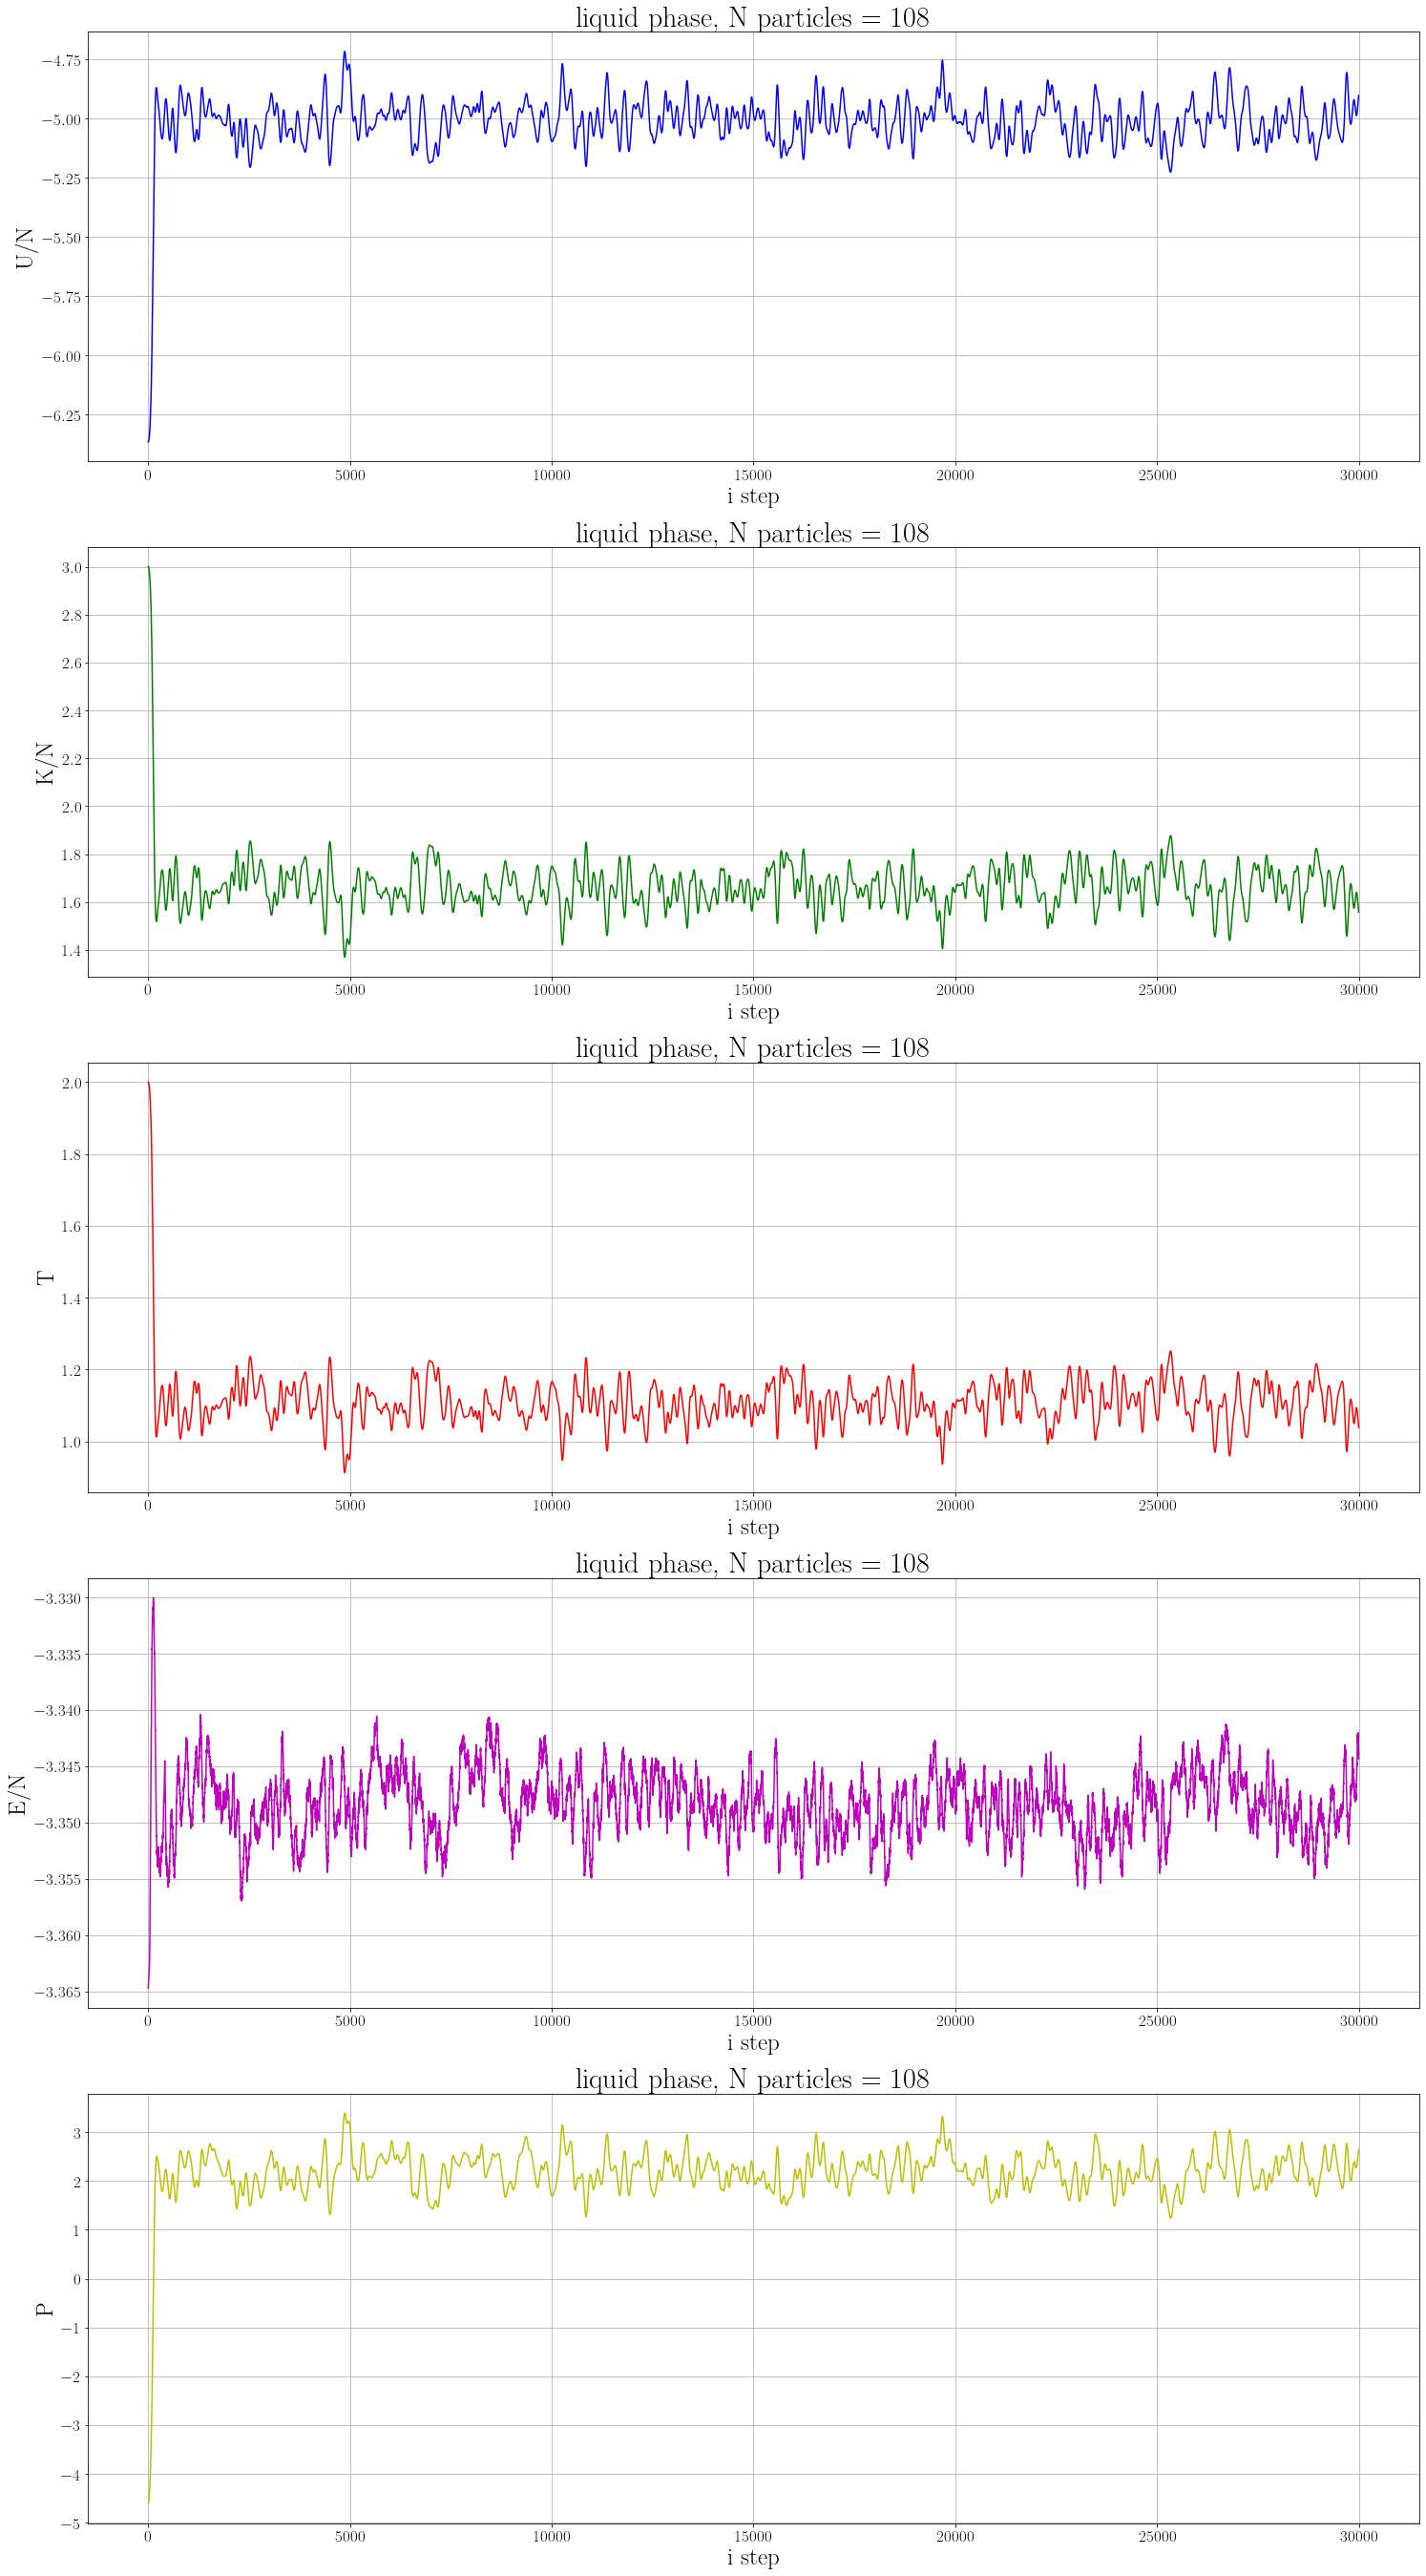

In [38]:
#equilibration plots
fig, axes = plt.subplots(Nobs, figsize=(25, 48))

for i in range(Nobs) :
    Nblocks_vec[i], Y_vec[i] = load_eq_data(filename[i])
    plot_eq_data(axes[i], Nblocks_vec[i], Y_vec[i], Obs[i], N ,colors[i])

- Si può osservare come $T^*$ e $K^*$ abbiano lo stesso andamento. Questo è ovvio e atteso essendo che per calcolare la temperatura è stato utilizzato il teorema di equipartizione.
- L'energia totale inoltre varia all'ordine $10^{-3}$  e può quindi essere ritenuta costante, dimostrazione che l'algoritmo di Verlet conserva l'energia ed rispetta l'ensamble microcanonico
- In questi grafici sono riportati gli andamenti dell'ultimo esperimento di equilibrazione. La temperatura $\widetilde{T^*}$ di partenza è quella di consente al sistema dopo circa $N_{steps}=300$ di raggiungere la temperatura $T^*$ richiesta dall'esercizio. Si può osservare come sia $T^*$ che $K^*$ vadano a crollare rapidamente prima di raggiungere l'equilibrio. La ragione di questo crollo risiede nel fatto che il sistema parte da una configurazione cristallina fcc estremamente ordinata, molto vicina ad un minimo del potenziale, che nel corso della dinamica non sarà più recuperabile dato che il sistema tende a disordinarsi. Dovendosi conservare l'energia totale del sistema (ensemble microcanonico), se l'energia potenziale aumenta (spostandosi dal minimo) l'energia cinetica e quindi la temperatura devono necessariamente diminuire. Lo spostamento da questo minimo è causato dal fatto che la configurazione di partenza è altamente improbabile per un liquido, ossia si tratta una configurazione che di fatto non si trova nell'ipersuperficie dello spazio delle fasi corrispondente al macrostato in equilibrio per i parametri dati in ingresso. IL sistema cerca quindi di riportarsi rapidamente all'equilibrio.

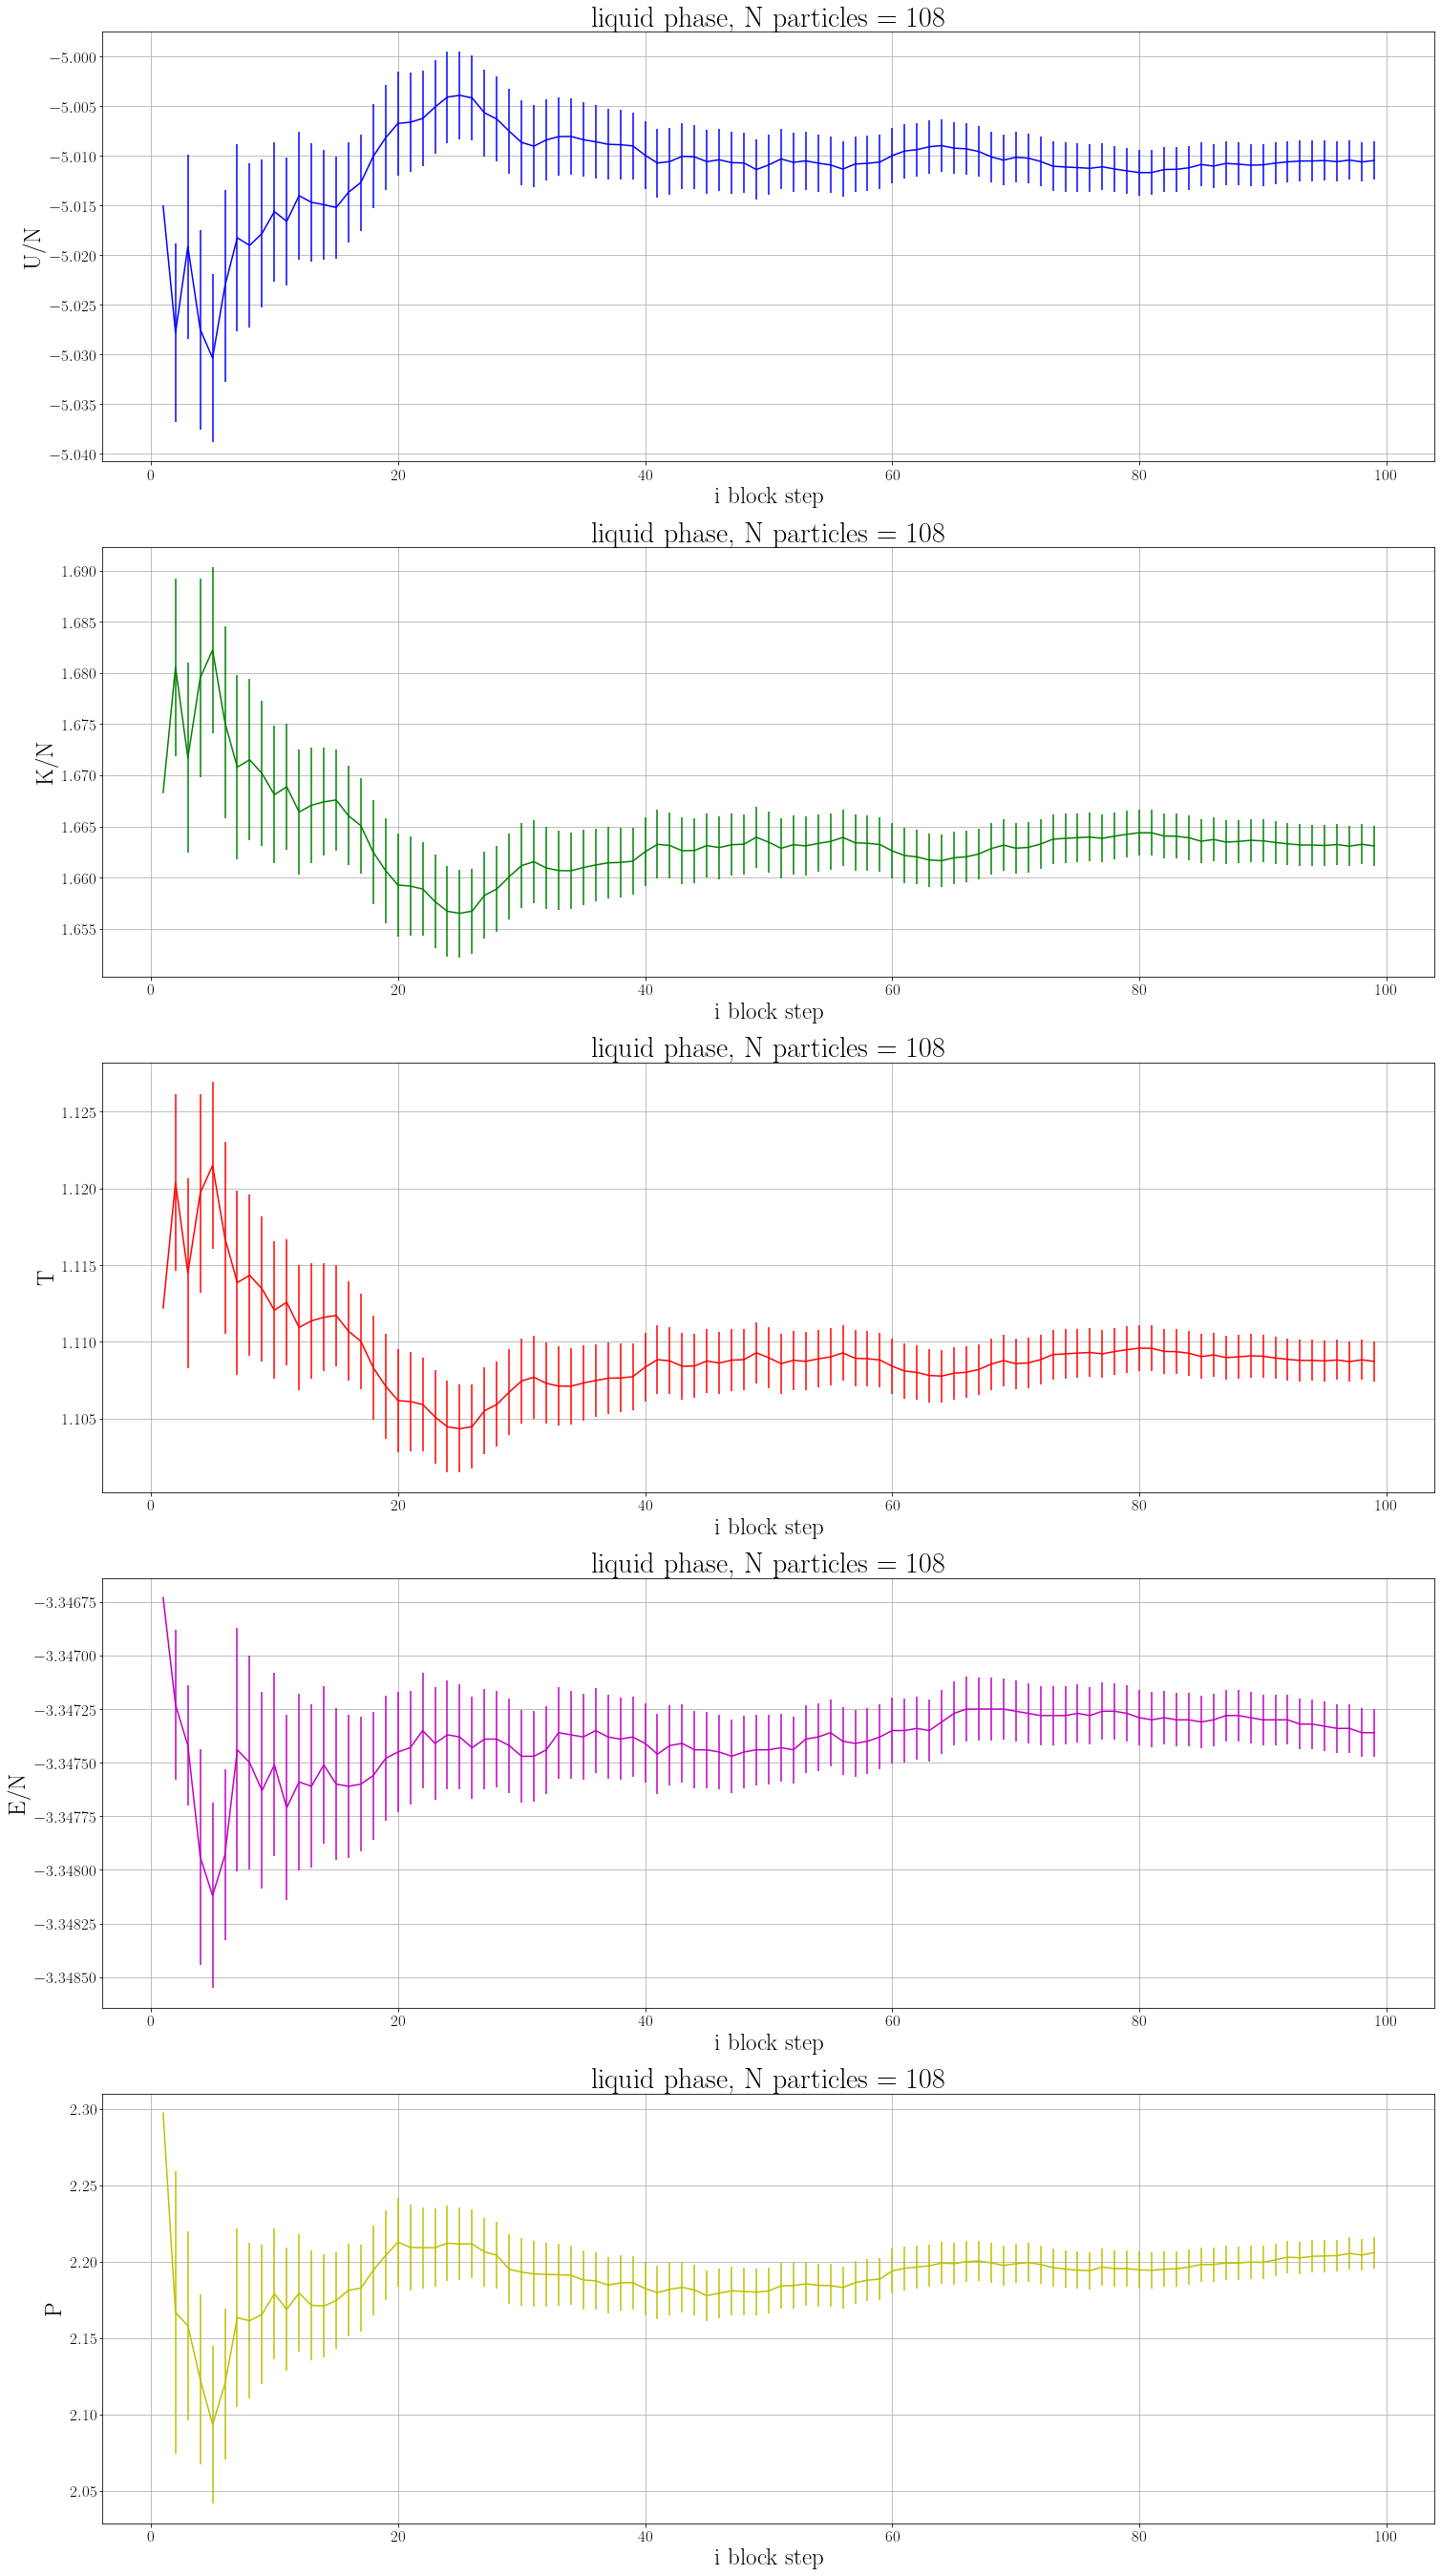

In [39]:
filename = np.empty(Nobs , dtype = object)

for i in range(Nobs):
    filename[i] = path + phase + "/averages/" + phase + names[i]

fig, axes = plt.subplots(Nobs , figsize = (25, 48))

for i in range(Nobs):
    Nblocks_vec[i], Y_vec[i], Y_err_vec[i] = load_Y_data(filename[i])
    plot_Y_data(axes[i], Nblocks_vec[i], Y_vec[i], Y_err_vec[i], Obs[i], N , colors[i])


- La prima osservazione riguarda il grafico dei valori medi della temperatura. Essi non sono statisticamente compatibili con il valore di equilibrio desiderato. Tale situazione si verifica poichè l'equilibrazione è un processo manuale compiuto dal programmatore *ad occhio*, ossia valutando visivamente l'andamento e le oscillazioni dei valori istantanei della temperatura ad ogni equilibrazione fino a quando essa non fluttua intorno alla temperatura target della simulazione.

- Ponendo l'attenzione sui valori riportati lungo l'asse delle ascisse è possibile accorgersi che le incertezze associate ai valori medi dell'energia interna totale sono inferiori a quelle dell'energia potenziale e cinetica, a riprova che l'algoritmo di Verlet conserva su scale di tempi sufficientemente lunghi l'energia totale del sistema come deve essere quando si studia l'ensemble microcanonico.

- Si può infine osservare come quasi tutte le variabili e i rispettivi errori (in particolare l'energia totale) sembrano assumere un insieme discreto di valori. Questo potrebbe essere semplicemente dovuto ad una scorretta conservazione dei dati nei file di output (per errori di rounding o perchè vengono salvate solamente poche cifre significative). Per evitare di dover rieseguire tutte le simulazioni sono stati lasciati in questo modo.


### Argon: fase solida

$\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)

In [40]:
phase="solid"

filename = np.empty(Nobs , dtype = object)

for i in range(Nobs):
    filename[i] = path + phase + "/equilibration/" + phase + names[i]

Nblocks_vec= np.empty(Nobs, dtype=object) #vector with i bloxk step index
Y_vec= np.empty(Nobs, dtype=object) #value of the observable per block
Y_err_vec= np.empty(Nobs, dtype=object) #err of the observable per block


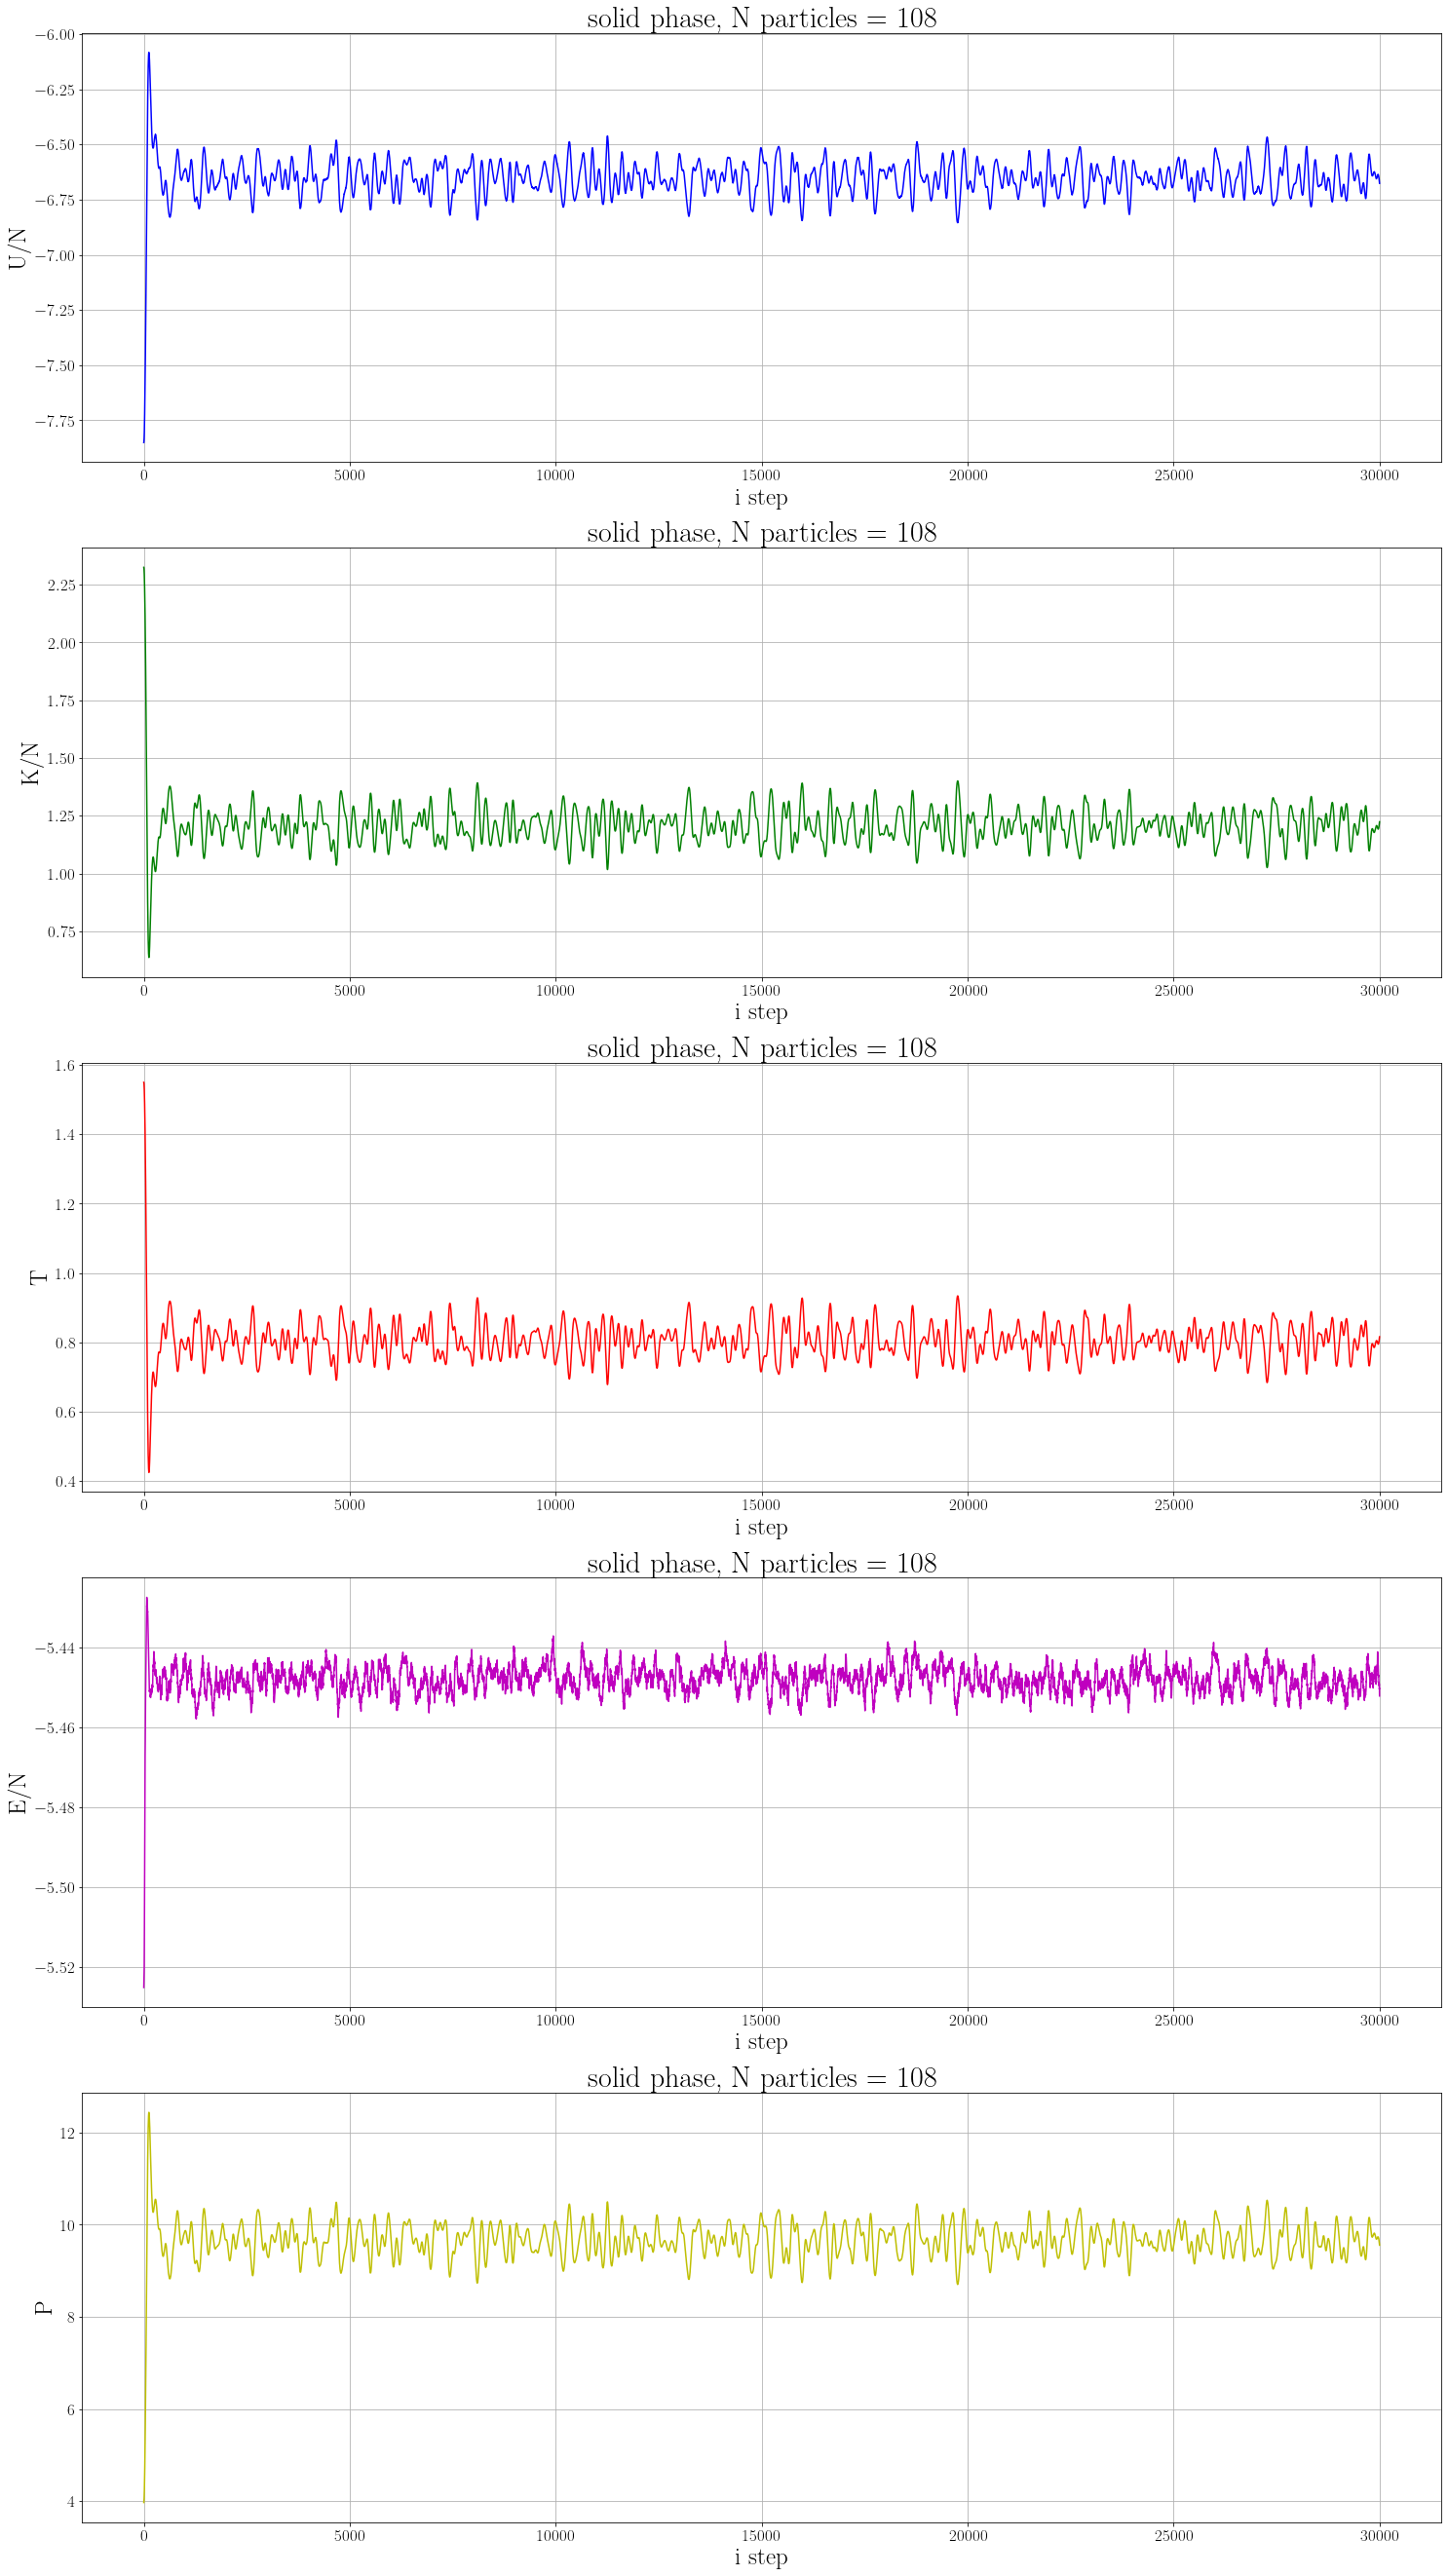

In [41]:
#equilibration plots
fig, axes = plt.subplots( Nobs, figsize=(25, 47))

for i in range(Nobs) :
    Nblocks_vec[i], Y_vec[i] = load_eq_data(filename[i])
    plot_eq_data(axes[i], Nblocks_vec[i], Y_vec[i], Obs[i], N ,colors[i])

- Valgono le stesse considerazioni fatte per la fase liquida. Nonostante le particelle siano vincolate a muoversi attorno alla posizione cristallina, la condizione di cristallo fcc è ancora molto improbabile anche per la fase solida, rappresentando una configurazione di equilibrio solo per un cristallo perfetto a $T=0$.

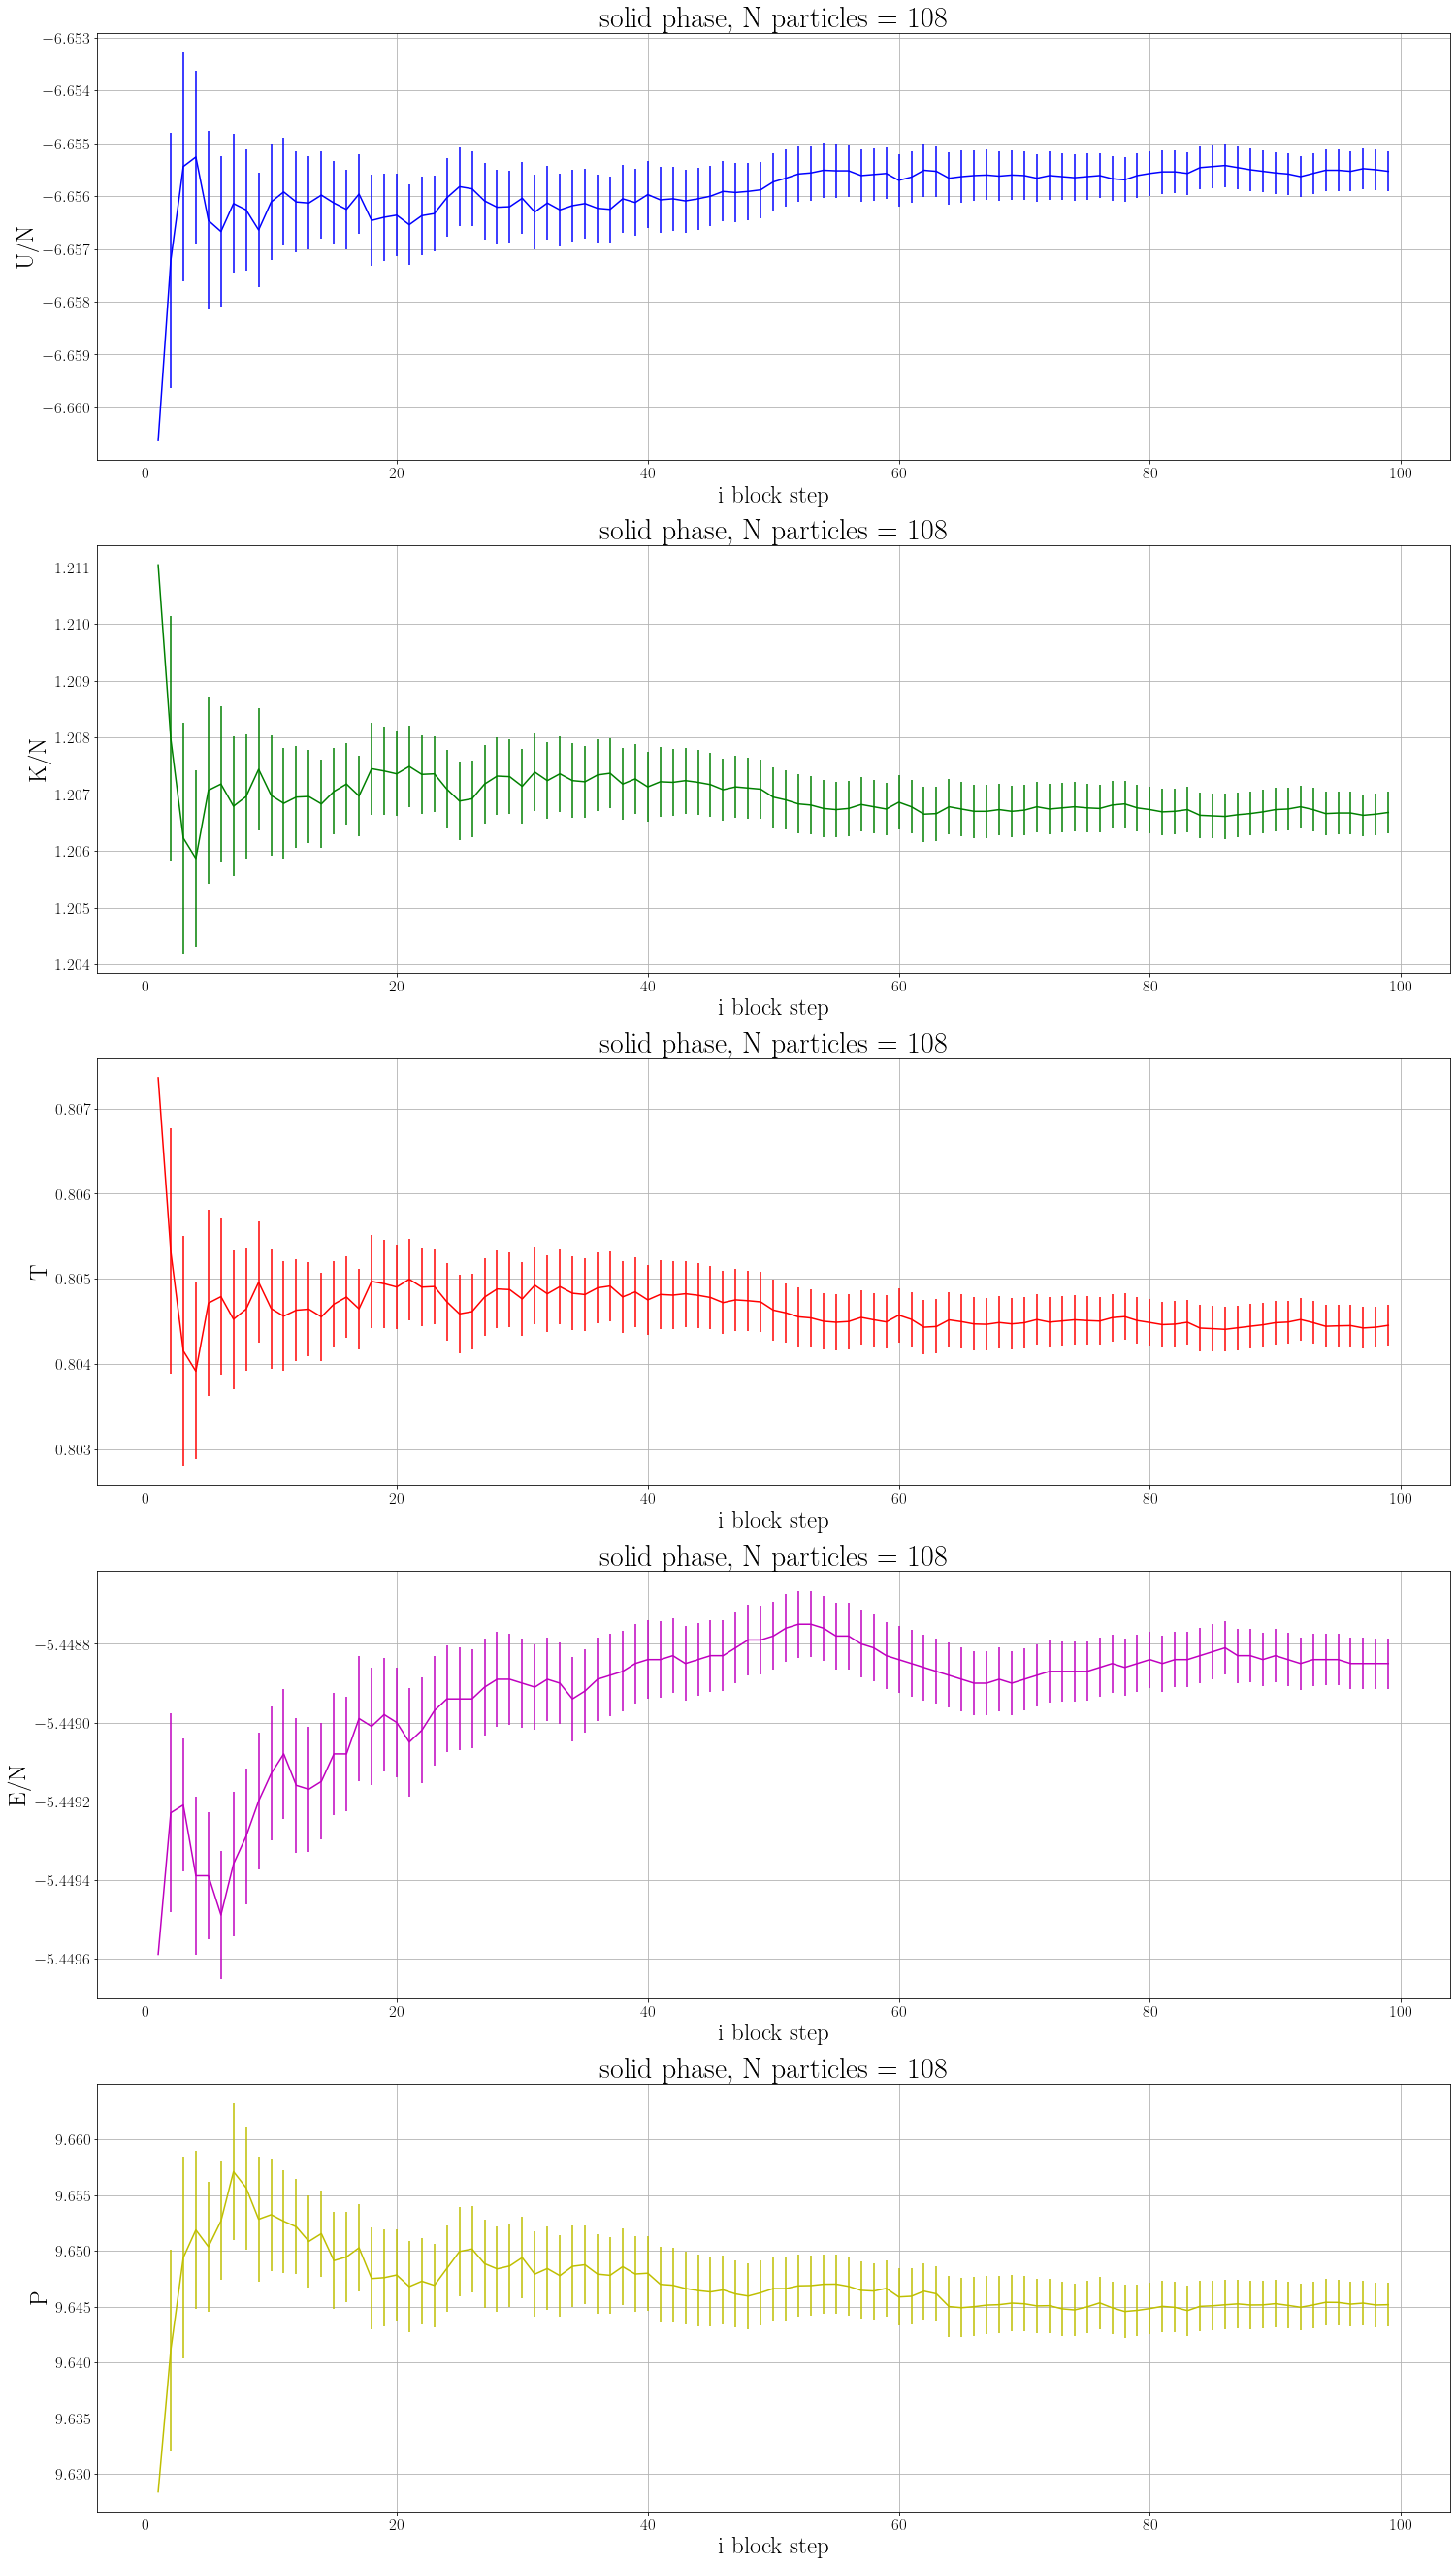

In [42]:
filename = np.empty(Nobs , dtype = object)

for i in range(Nobs):
    filename[i] = path + phase + "/averages/" + phase + names[i]

fig, axes = plt.subplots(Nobs , figsize = (25, 47))

for i in range(Nobs):
    Nblocks_vec[i], Y_vec[i], Y_err_vec[i] = load_Y_data(filename[i])
    plot_Y_data(axes[i], Nblocks_vec[i], Y_vec[i], Y_err_vec[i], Obs[i], N , colors[i])

- La fase solida è dominata dall'energia potenziale rispetto alla componenete cinetica. Questa considerazione implica che le particelle del fluido in questa fase possono vibrare intorno alle loro posizioni di equilibrio ma non si allontanano troppo dalla configurazione cristalina ordinata di partenza, come già preannunciato

- Le considerazioni fatte per $T^*$, $K^*$ e $E^*$ nella fase liquida sono ancora valide

### Argon: fase gassosa

$\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

In [44]:
phase="gas"

filename = np.empty(Nobs , dtype = object)

for i in range(Nobs):
    filename[i] = path + phase + "/equilibration/" + phase + names[i]

Nblocks_vec= np.empty(Nobs, dtype=object) #vector with i bloxk step index
Y_vec= np.empty(Nobs, dtype=object) #value of the observable per block
Y_err_vec= np.empty(Nobs, dtype=object) #err of the observable per block

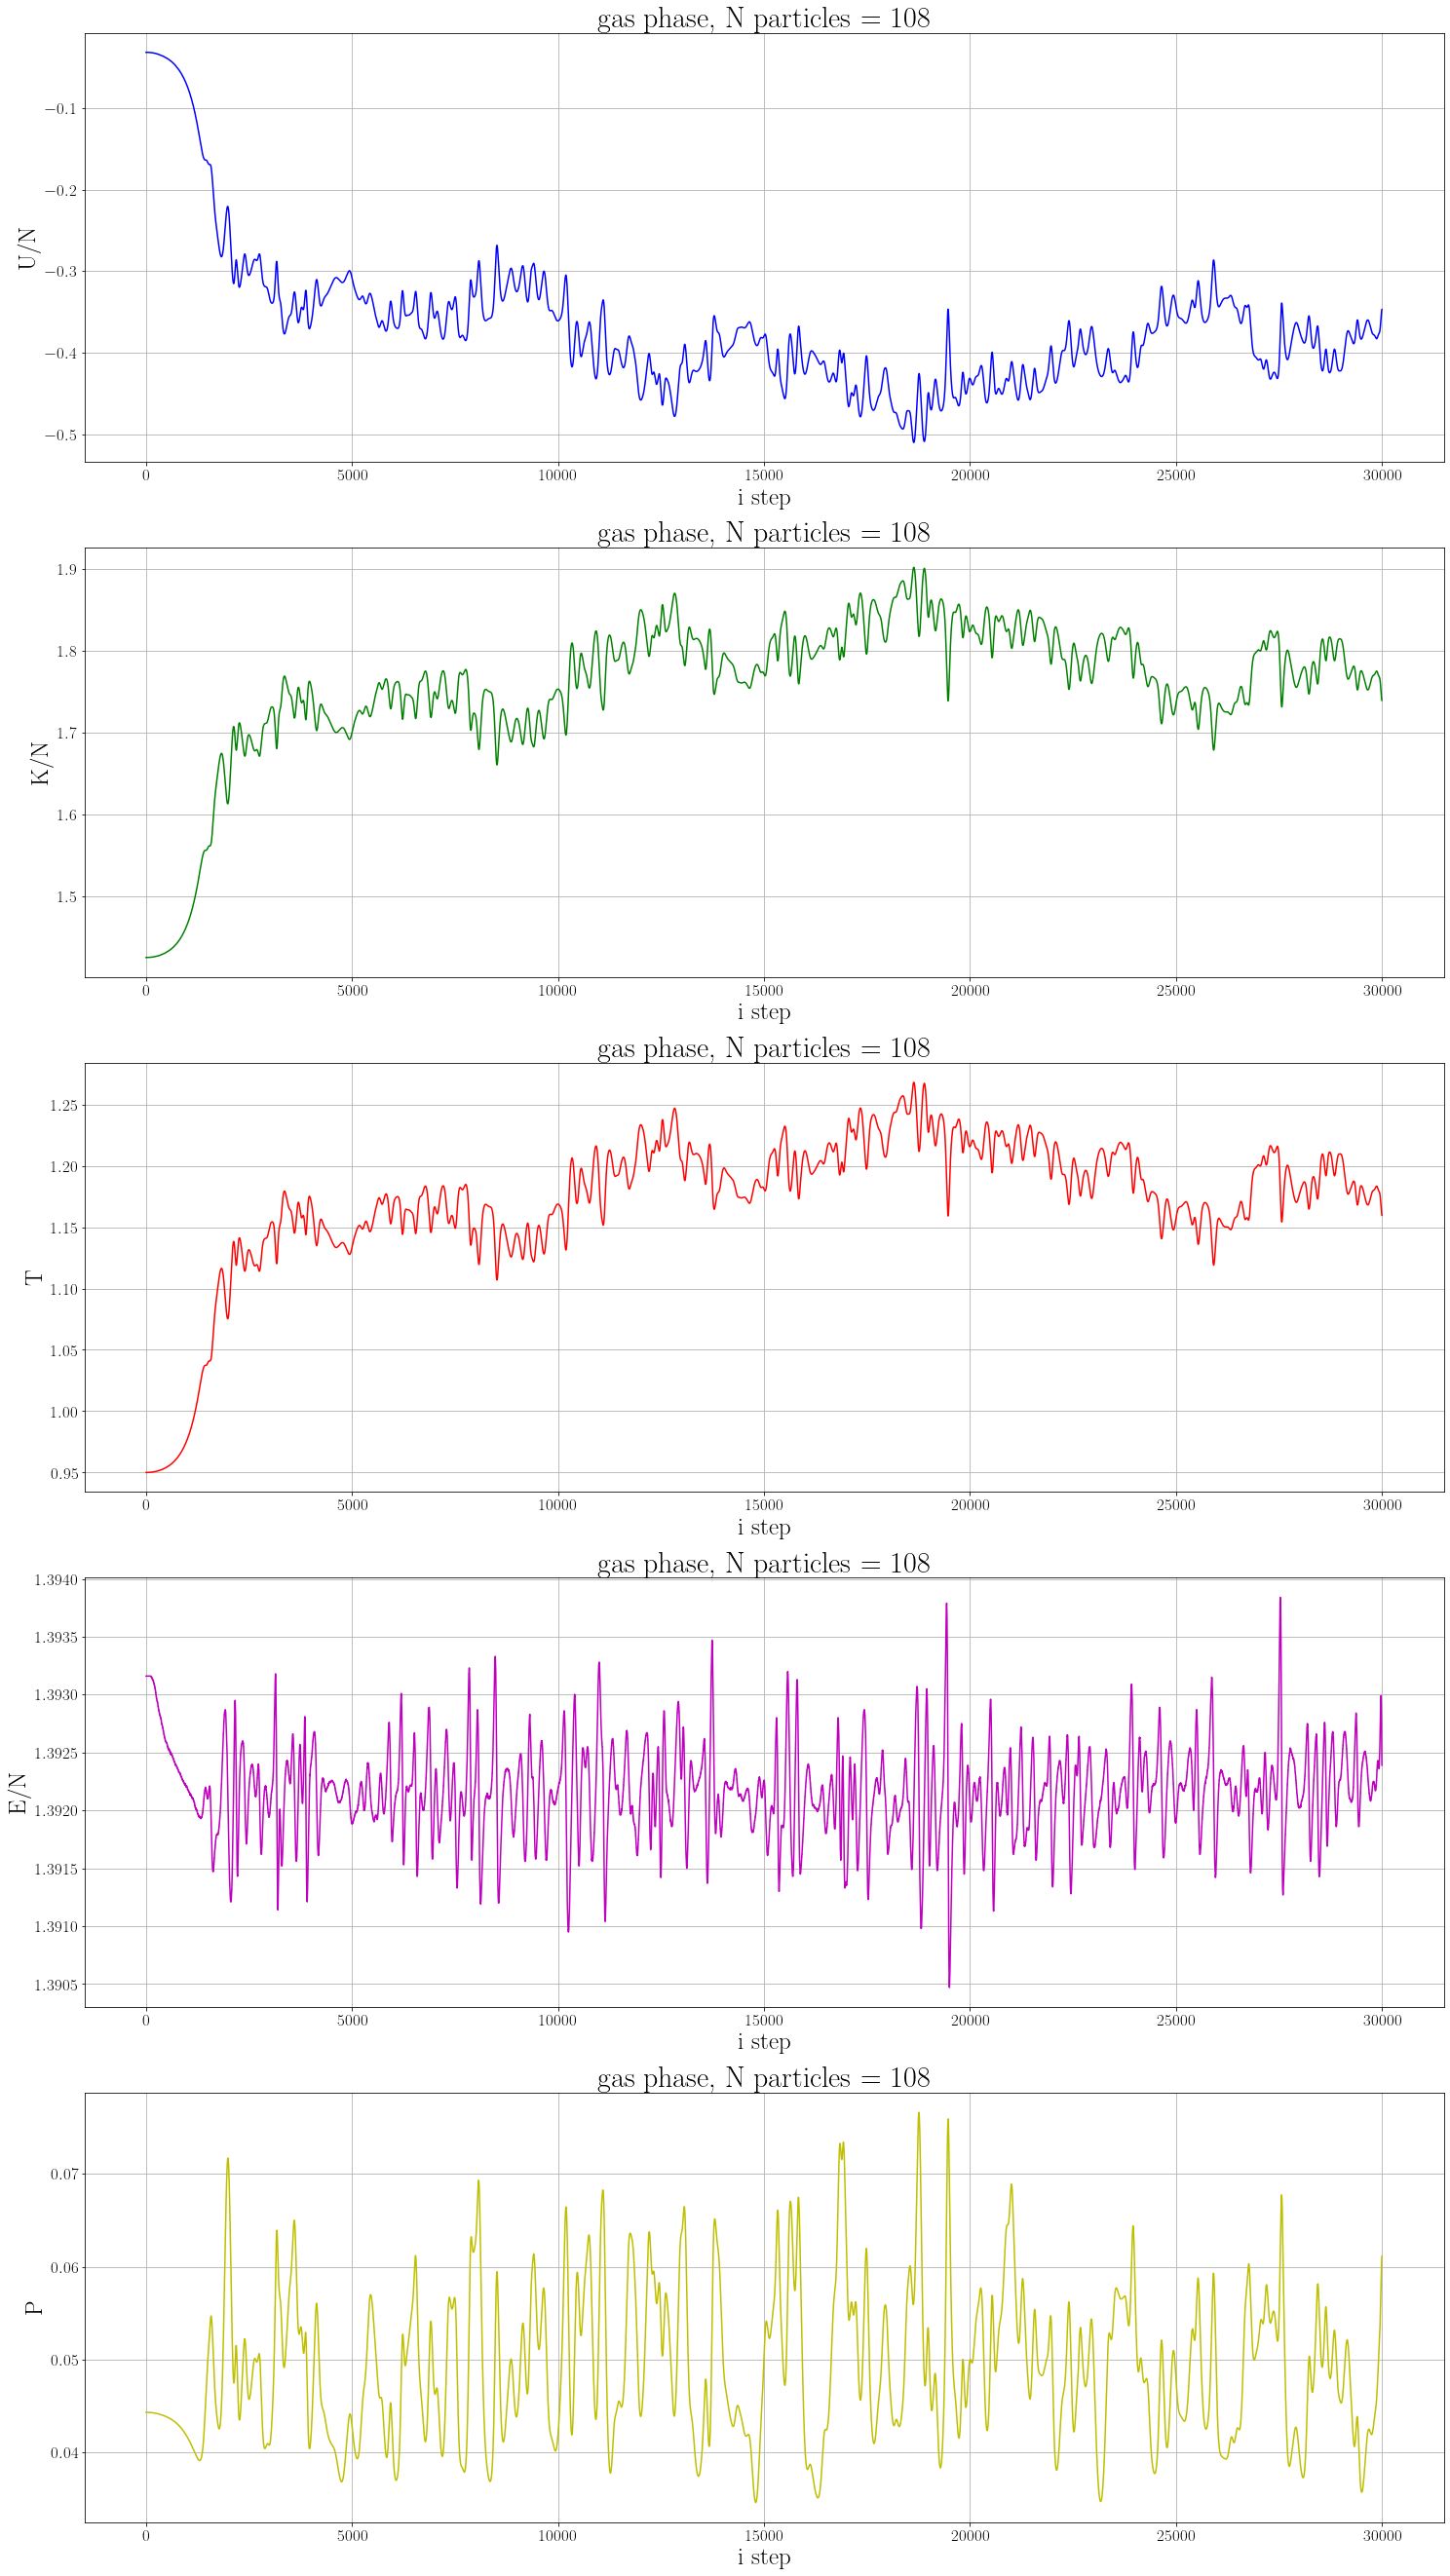

In [45]:
#equilibration plots
fig, axes = plt.subplots( Nobs, figsize=(25, 47))

for i in range(Nobs) :
    Nblocks_vec[i], Y_vec[i] = load_eq_data(filename[i])
    plot_eq_data(axes[i], Nblocks_vec[i], Y_vec[i], Obs[i], N, colors[i])

- Si può constatare come l'equilibrazione sia molto più difficile da raggiungere in questo caso. La ragione principale potrebbe essere dovuta  al fatto che stiamo considerando un gas molto diluito. La densità molto bassa rende la fenomenologia molto simile a quella di un gas poco interagente, nonostante il potenziale LJ. Infatti le particelle viaggiano molto, prima di trovare un'altra particella con cui interagire (nonostante il $r_c$ superiore rispetto alle altre fasi). A causa di questo il sitema richiede molto più tempo per raggiungere l'equilibrio ($N_{step} \simeq 10^4$). Una soluzione possibile a questo problema potrebbe essere aumentare $r_c$ ulteriormente (senza superare le dimensioni del box delle P.b.c.) o considerare come step della simulazione, più step dell'algoritmo di Verlet.

- L'equilibrazione stessa è qui differente. L'energia potenziale nelle prime fasi dell'esperimento tende a diminuire e di conseguenza, per la conservazione dell'energia, $T^*$ e $K^*$ aumentano. Questo avviene sempre a causa della configurazione particolare di partenza. Come già detto il gas considerato è analogo ad un gas quasi perfetto. La posizione fcc iniziale è quindi molto insolita per un gas di questo tipo, prevalentemente cinetico, ed è di conseguenza ad un valore molto più elevato di energia potenziale rispetto a quello di equilibrio. La $U^*$ tenderà quindi a diminuire il suo valore durante l'equilibrazione.

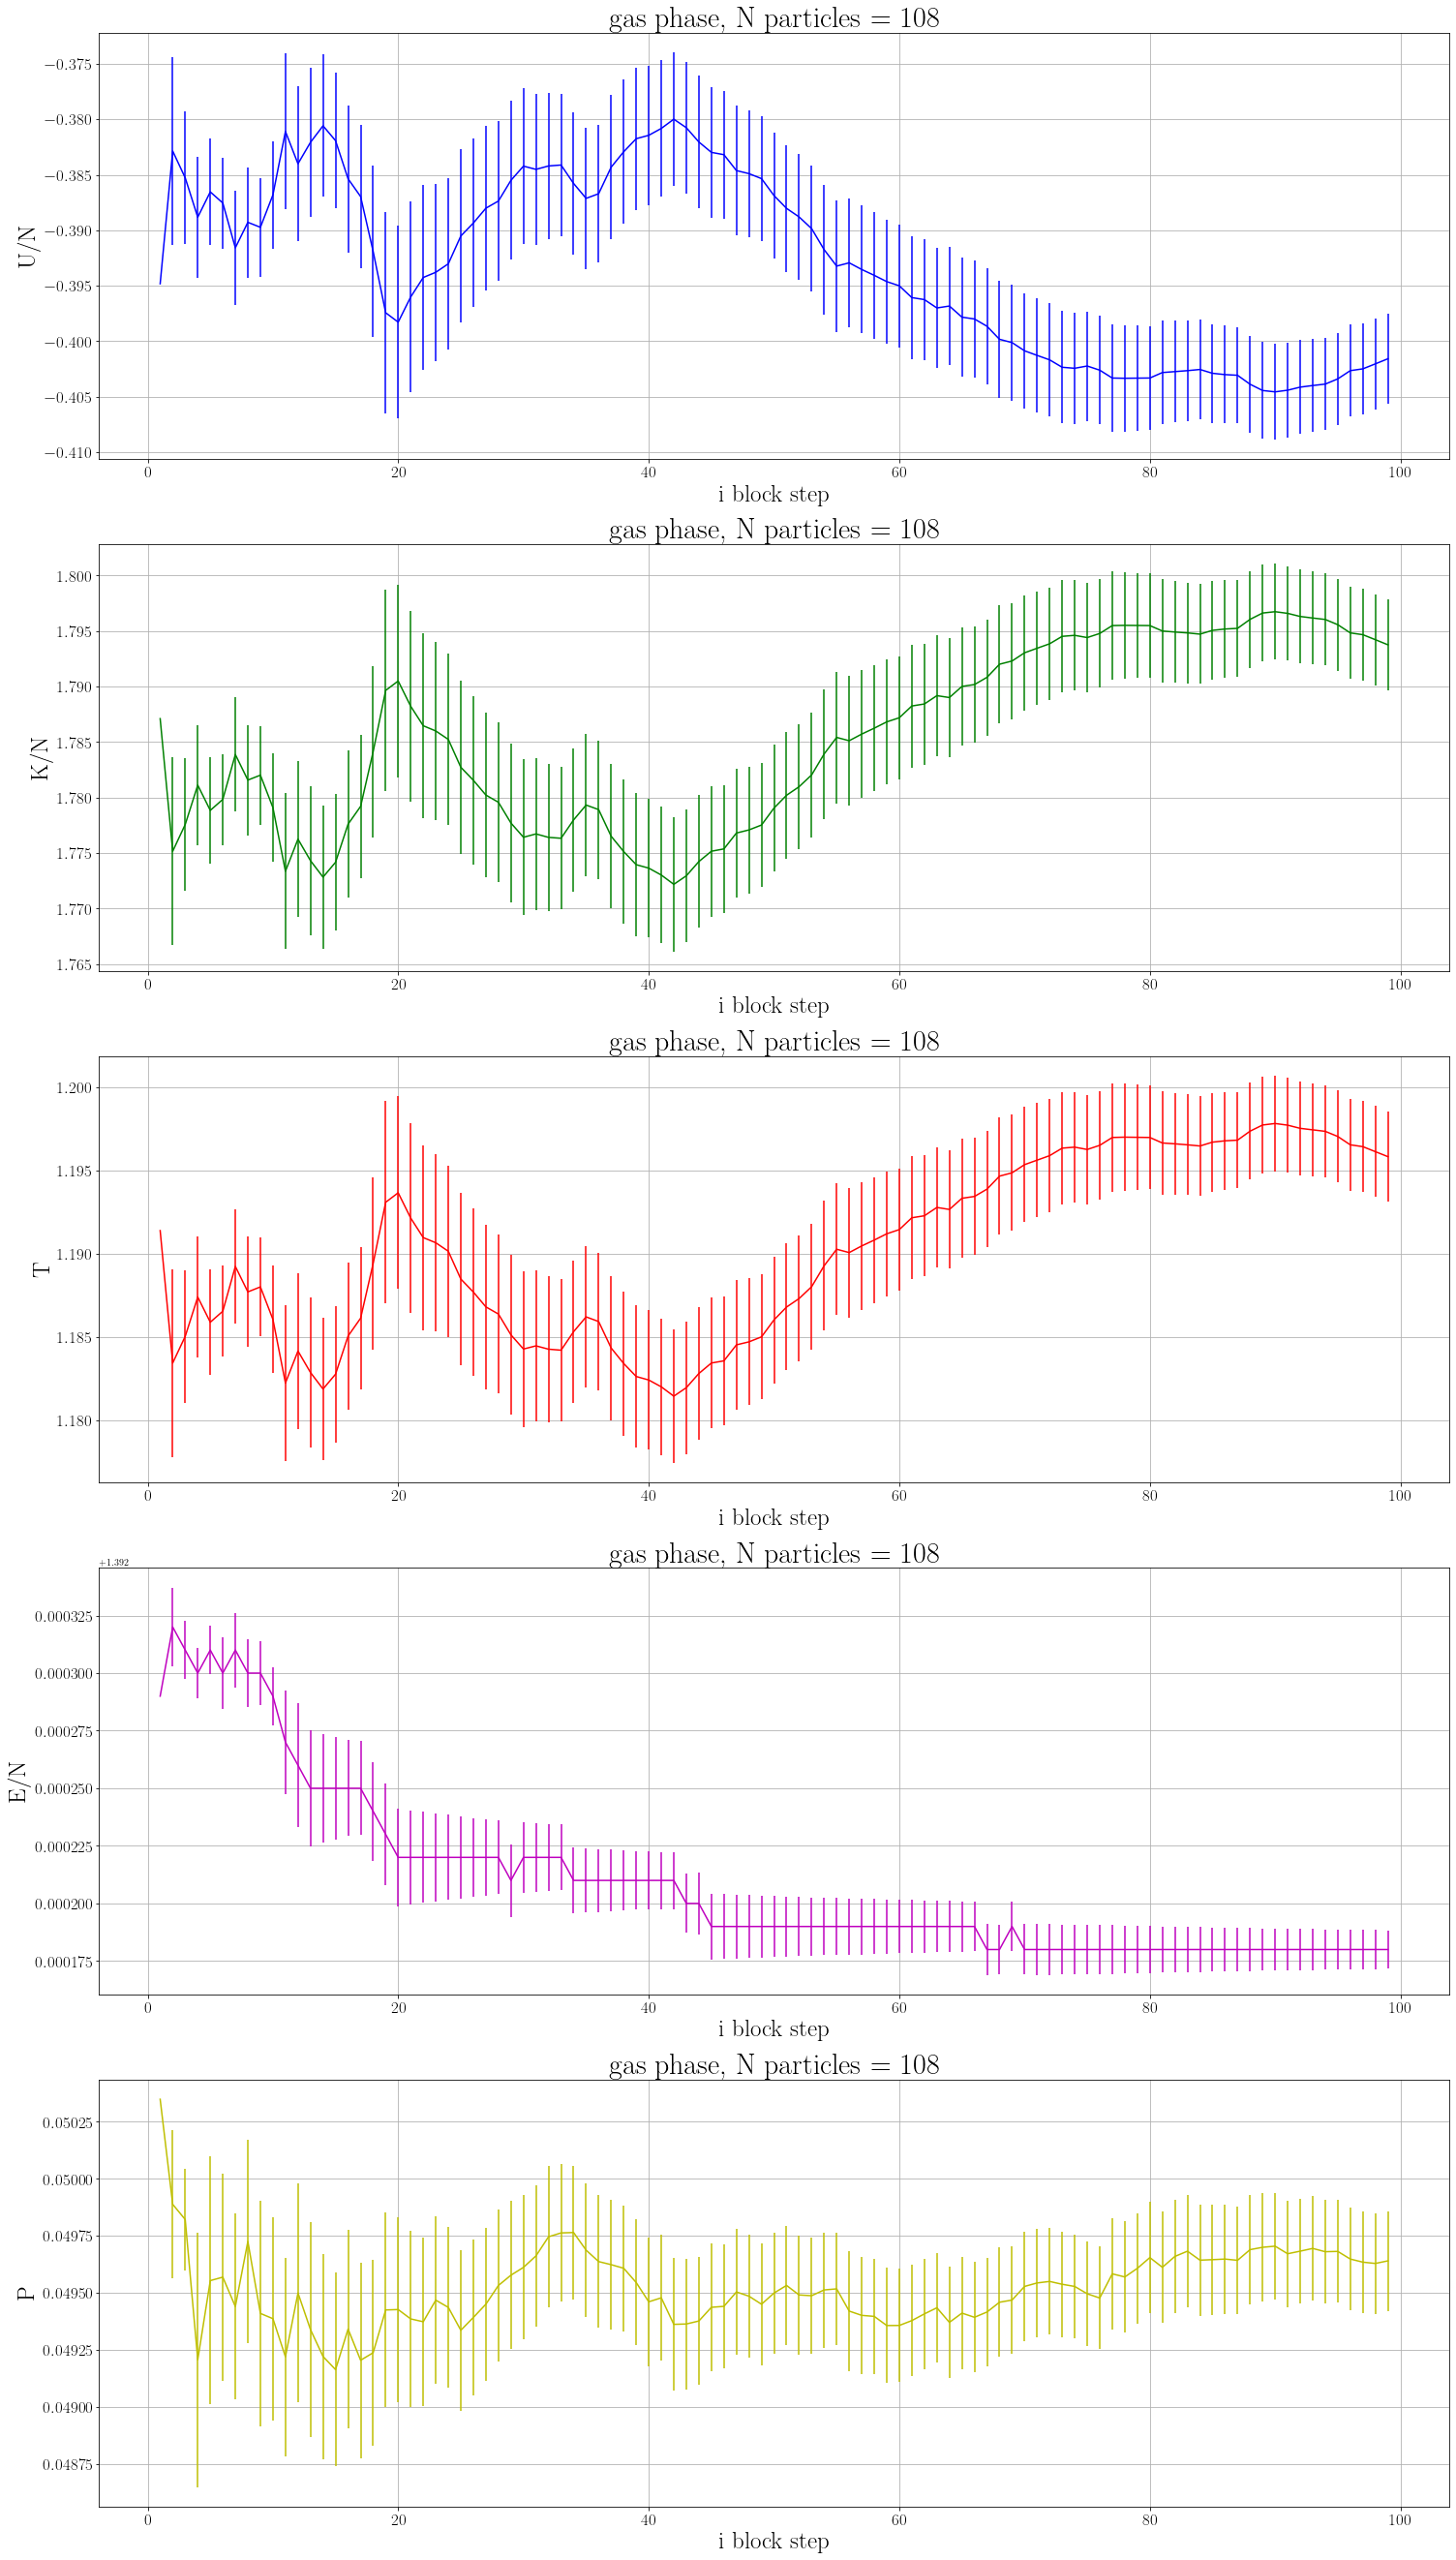

In [46]:
filename = np.empty(Nobs , dtype = object)

for i in range(Nobs):
    filename[i] = path + phase + "/averages/" + phase + names[i]

fig, axes = plt.subplots(Nobs , figsize = (25, 47))

for i in range(Nobs):
    Nblocks_vec[i], Y_vec[i], Y_err_vec[i] = load_Y_data(filename[i])
    plot_Y_data(axes[i], Nblocks_vec[i], Y_vec[i], Y_err_vec[i], Obs[i], N, colors[i])

- Come ci si aspetta da un gas di questo tipo la componente principale dell'energia è quella cinetica.

- Le considerazioni sulla rappresentazione numerica di $T^*$, $K^*$ e $E^*$ sono qua ancora più evidenti.